In [13]:
path = '/Users/sathishc/Downloads/iris.data'

In [14]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report


#reading the data
data = pd.read_csv(path, sep=",", names = ["Sepal Length","Sepal Width", "Petal Length","Petal Width","Species"])
print(data)

     Sepal Length  Sepal Width  Petal Length  Petal Width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [15]:
#converting categorical to numerical values
data['Species'].replace(['Iris-setosa', 'Iris-versicolor','Iris-virginica'], [2, 1, 0], inplace=True)

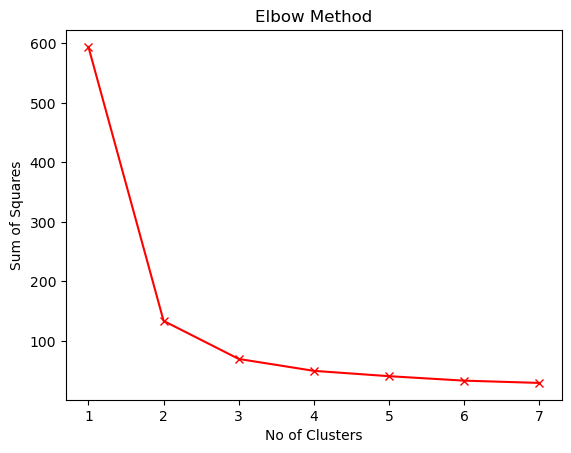

In [16]:
X=data.iloc[:,0:3].values

inertia=[]

#using elbow method to find the optimal K value
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0).fit(X) # Finding inertia on various k values
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 8), inertia, color='red', marker='x')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Sum of Squares') 
plt.show()

In [17]:
#funtion that returns vector form of centroids
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [18]:
c1 = data['Sepal Length'].values    
c2 = data['Sepal Width'].values
c3 = data['Petal Length'].values
c4 = data['Petal Width'].values
x = np.array(list(zip(c1,c2,c3,c4)))

#no of clusters, found using elbow method
k=3                            

#cluster centroid of first feature
c1 = [x[0][0],x[1][0],x[2][0]] 
#cluster centroid of second feature
c2 = [x[0][1],x[1][1],x[2][1]] 
#cluster centroid of third feature
c3 = [x[0][2],x[1][2],x[2][2]] 
#cluster centroid of fourth feature
c4 = [x[0][3],x[1][3],x[2][3]] 

c = np.array(list(zip(c1,c2,c3,c4)), dtype=np.float32)
print(c)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [19]:
old_c = np.zeros(c.shape)
#stores the cluster assigned to data points
clusters = np.zeros(len(x))
error = dist(c, old_c, None)
while error!=0:
    #each point is assigned to the nearest cluster
    for i in range(len(x)):
        distances = dist(x[i],c)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    old_c = deepcopy(c)
    #finding the new centroid value of each cluster
    for i in range(k):
        points = [x[j] for j in range(len(x)) if clusters[j] == i]
        c[i] = np.mean(points, axis=0)
    #updating error
    error = dist(c, old_c, None)

In [20]:
print("The centroids of clusters are: \n", c)
print("\nThe predicted values are: \n", clusters)
print("\nThe error is: ", error)

The centroids of clusters are: 
 [[6.853846  3.0769231 5.7153845 2.0538461]
 [5.8836064 2.7409837 4.3885245 1.4344262]
 [5.006     3.418     1.464     0.244    ]]

The predicted values are: 
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]

The error is:  0.0


In [21]:
print(classification_report(data['Species'],clusters,target_names=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']))

                 precision    recall  f1-score   support

 Iris-virginica       0.92      0.72      0.81        50
Iris-versicolor       0.77      0.94      0.85        50
    Iris-setosa       1.00      1.00      1.00        50

       accuracy                           0.89       150
      macro avg       0.90      0.89      0.89       150
   weighted avg       0.90      0.89      0.89       150



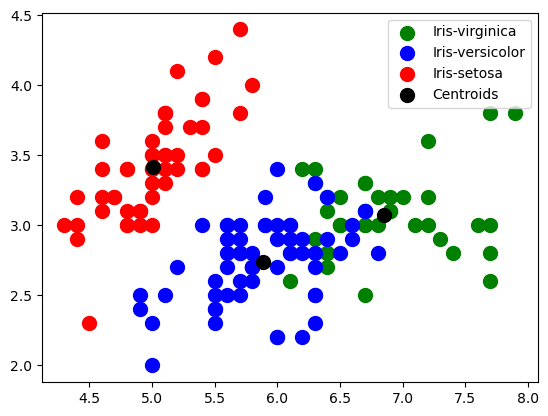

In [22]:
#plotting the clusters
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s = 100, c = 'red', label = 'Iris-setosa')

#plotting the centroids of the clusters
plt.scatter(c[:, 0], c[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()